In [1]:
from lectura import ldata
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [4]:
datosapms=ldata('tc01_data/yeast_AP-MS.txt')
datoslit=ldata('tc01_data/yeast_LIT.txt')
datosy2h=ldata('tc01_data/yeast_Y2H.txt')

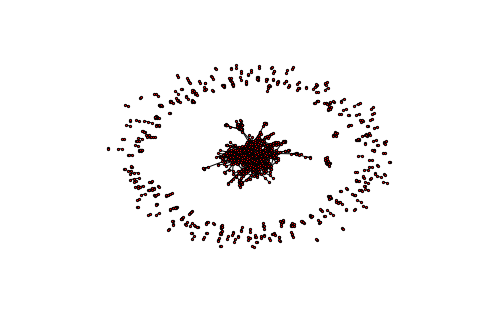

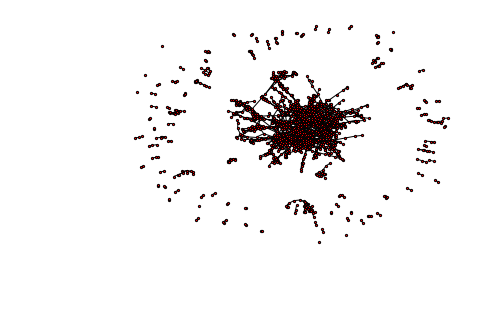

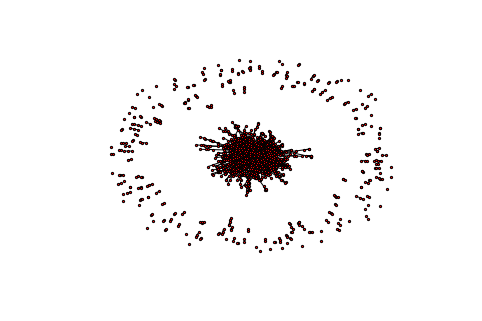

In [5]:
G1 = nx.Graph()#directed
G2=nx.Graph()
G3=nx.Graph()


G1.add_edges_from(datosapms)
G2.add_edges_from(datoslit)
G3.add_edges_from(datosy2h)

nx.draw(G1, with_labels=False, node_size=5)

plt.show()
nx.draw(G2, with_labels=False, node_size=5)

plt.show()
nx.draw(G3, with_labels=False, node_size=5)

plt.show()

In [6]:
nodos=[G1.number_of_nodes(),G2.number_of_nodes(),G3.number_of_nodes()]
enlaces=[G1.number_of_edges(),G2.number_of_edges(),G3.number_of_edges()]
dirigido=["no","no","no"]
kmean = [np.mean(list(dict(G1.degree).values())),np.mean(list(dict(G2.degree).values())),
         np.mean(list(dict(G3.degree).values()))]
kmin = [np.min(list(dict(G1.degree).values())),np.min(list(dict(G2.degree).values())),
         np.min(list(dict(G3.degree).values()))]
kmax = [np.max(list(dict(G1.degree).values())),np.max(list(dict(G2.degree).values())),
         np.max(list(dict(G3.degree).values()))]

densidad = [nx.density(G1),nx.density(G2),nx.density(G3)]
clusteringglobal = [nx.transitivity(G1),nx.transitivity(G2),nx.transitivity(G3)]
clusteringlocal = [nx.average_clustering(G1),nx.average_clustering(G2),nx.average_clustering(G3)]
diametro = [nx.diameter(max(nx.connected_component_subgraphs(G1), key=len)),
            nx.diameter(max(nx.connected_component_subgraphs(G2), key=len)),
            nx.diameter(max(nx.connected_component_subgraphs(G3), key=len))]

In [7]:
giant=max(nx.connected_component_subgraphs(G1), key=len)
print (nx.diameter(giant))

15


In [8]:
info = pd.DataFrame({"ID":['apms','lit','y2h'],"nodos":nodos,"enlaces":enlaces,"dirigido":dirigido,"kmean":kmean,
                    "kmin":kmin,"kmax":kmax,"densidad":densidad,"clusteringglobal":clusteringglobal,
                    "clusteringlocal":clusteringlocal,"diametro":diametro})

In [9]:
info

,ID,clusteringglobal,clusteringlocal,densidad,diametro,dirigido,enlaces,kmax,kmean,kmin,nodos
0,apms,0.618590,0.554636,0.006899,15,no,9070,127,11.183724,1,1622
1,lit,0.346193,0.292492,0.002481,19,no,2925,40,3.808594,1,1536
2,y2h,0.023614,0.046194,0.001440,14,no,2930,91,2.903865,1,2018


In [ ]:
## Ejercicio 2

In [2]:
delfines = nx.read_gml('/home/yuditsabet/RedesComplejas/cloneEnd/TP1/tc01_data/dolphins.gml')

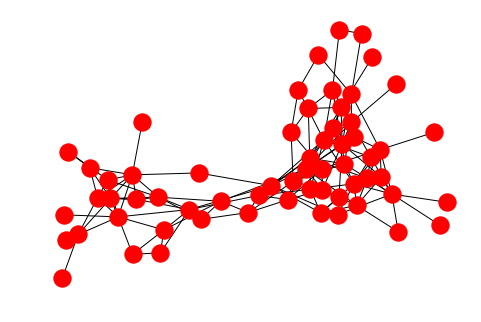

In [3]:
nx.draw(delfines)#, with_labels=True)
plt.show()

In [4]:
delfines.node

NodeView(('Grin', 'Ripplefluke', 'Jet', 'MN23', 'Feather', 'SN96', 'Scabs', 'Beescratch', 'MN105', 'Thumper', 'Cross', 'Web', 'DN21', 'DN63', 'Quasi', 'Shmuddel', 'TR120', 'SN9', 'Zig', 'TSN83', 'Patchback', 'SN89', 'Wave', 'Number1', 'MN83', 'Beak', 'Trigger', 'Vau', 'Kringel', 'Mus', 'CCL', 'MN60', 'Double', 'Jonah', 'Zipfel', 'SN4', 'PL', 'TR88', 'Fork', 'Notch', 'Zap', 'Gallatin', 'Oscar', 'Haecksel', 'Whitetip', 'Fish', 'Bumper', 'Stripes', 'TR82', 'Knit', 'TR77', 'Five', 'SMN5', 'Upbang', 'SN100', 'TSN103', 'SN63', 'Topless', 'TR99', 'Hook', 'SN90', 'DN16'))

In [5]:
generos=ldata('tc01_data/dolphinsGender.txt')

In [6]:
print(generos)

[['Five', 'f'], ['Cross', 'm'], ['SMN5', 'm'], ['MN83', 'm'], ['Trigger', 'f'], ['Patchback', 'm'], ['Vau', 'f'], ['Fork', 'm'], ['TR120', 'f'], ['MN105', 'm'], ['Haecksel', 'm'], ['MN60', 'm'], ['Stripes', 'f'], ['Jonah', 'm'], ['TSN103', 'f'], ['Topless', 'm'], ['Scabs', 'f'], ['TR99', 'f'], ['Shmuddel', 'f'], ['TSN83', 'NA'], ['Grin', 'm'], ['Zap', 'NA'], ['SN9', 'f'], ['SN4', 'f'], ['SN63', 'f'], ['Hook', 'f'], ['Whitetip', 'f'], ['Kringel', 'f'], ['Zipfel', 'm'], ['SN89', 'f'], ['SN100', 'f'], ['Double', 'f'], ['CCL', 'f'], ['Thumper', 'm'], ['Beak', 'm'], ['Fish', 'f'], ['Oscar', 'm'], ['TR77', 'f'], ['SN96', 'm'], ['Bumper', 'm'], ['PL', 'm'], ['TR82', 'NA'], ['DN16', 'f'], ['Web', 'm'], ['SN90', 'm'], ['Beescratch', 'm'], ['Wave', 'f'], ['Feather', 'm'], ['Gallatin', 'm'], ['Upbang', 'm'], ['DN63', 'm'], ['DN21', 'm'], ['Jet', 'm'], ['Number1', 'm'], ['Knit', 'm'], ['Zig', 'm'], ['Ripplefluke', 'NA'], ['MN23', 'm'], ['Quasi', 'm'], ['Mus', 'm'], ['Notch', 'm'], ['TR88', 'f']]


In [7]:
# Asigno la clase genero a cada nodo de la red
for delfin in generos:    
    delfines.node[delfin[0]]["genero"]=delfin[1]    

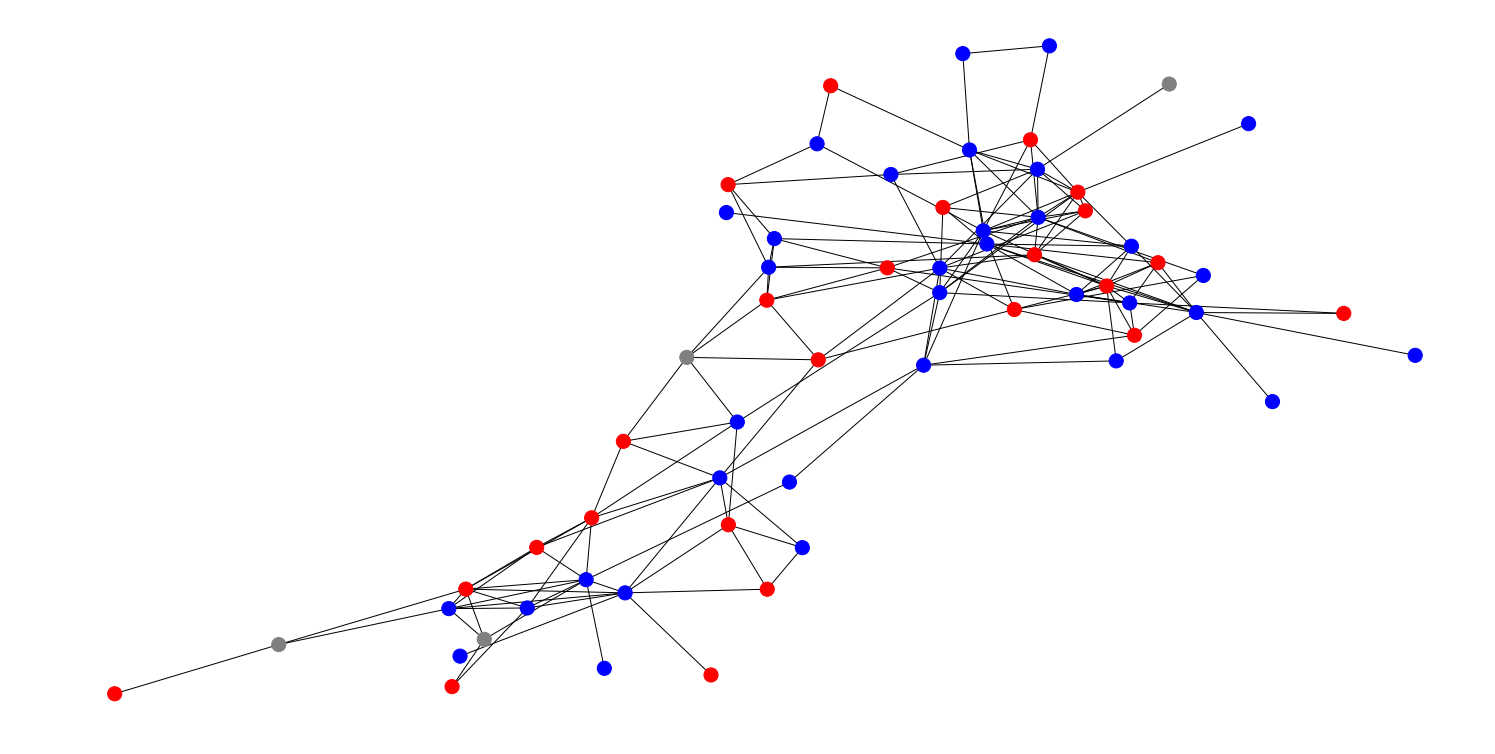

In [8]:
plt.figure(figsize=(20,10))
nx.draw(delfines, 
        width=1, 
        node_color=["blue" if g=="m" else "red" if g=="f" else "grey"  for g in nx.get_node_attributes(delfines, "genero").values()], 
        node_size=200,
        with_labels=False,
       pos=nx.fruchterman_reingold_layout(delfines)
       )
plt.show()

0.503182389937
0.0435617860941


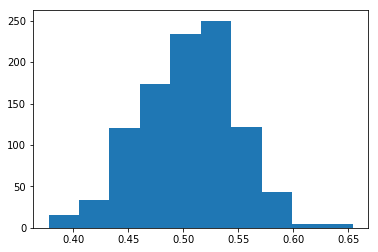

0.5031446540880503
0.404


In [40]:
sexos=dict(delfines.node.data("genero"))
test=delfines
N=1000
cantidadcruzada=[]

# N realizaciones aleatorias de genero  
for i in range(N):
    for delfin,genero in zip(test,np.random.permutation(list(sexos.values()))):
        
        # Asigna genero a delfines(nodos) de test a partir de la realizacion aleatoria       
        test.node[delfin]["genero"]=genero
       
    # Cuenta el # de enlaces de generos diferentes (clsases diferentes)
    contador=0
    for enlaces in list(test.edges):          
            # Compara el genero de dos nodos enlazados    
            if test.node[enlaces[0]]["genero"]!=test.node[enlaces[1]]["genero"]:
                contador=contador+1
                
    cantidadcruzada.append(contador/test.number_of_edges())

cantidadcruzada.sort()
print(np.mean(cantidadcruzada))
print(np.std(cantidadcruzada))

plt.hist(cantidadcruzada)
plt.show()


contador=0
for enlaces in list(delfines.edges):
            if delfines.node[enlaces[0]]["genero"]!=delfines.node[enlaces[1]]["genero"]:
                contador=contador+1       
            
cruzadadelfines=contador/delfines.number_of_edges()


j=0
while cantidadcruzada[j]<cruzadadelfines:
    j=j+1
print(j/N)


In [41]:
# Ejercicio 3

"""
Considere la red as-22july06.gml creada por Mark Newman que contiene la estructura de los
sistemas autónomos de internet relevada a mediados de 2006.

a. Encuentre gráficamente la distribución de grado Pk como función de k explorando
diferentes alternativas: un bineado lineal o logarítmico, utilizando escalas logarítmicas o
lineales en uno o ambos ejes. Discuta que alternativa permite apreciar mejor el carácter
libre de escala de dicha distribución
"""

In [2]:
sistautinternet = nx.read_gml('/home/yuditsabet/RedesComplejas/cloneEnd/TP1/tc01_data/as-22july06.gml')

In [3]:
#nx.draw(sistautinternet)#, with_labels=True)
#plt.show()

In [4]:
from collections import defaultdict

grados = defaultdict(int)
for i in (list(dict(sistautinternet.degree).values())): 
    grados[i]+=1
    gord = sorted(grados.items())
    k, pk = np.array(gord).T
    pk = [float(i) / sum(pk) for i in pk]

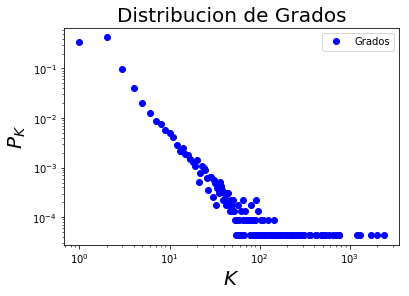

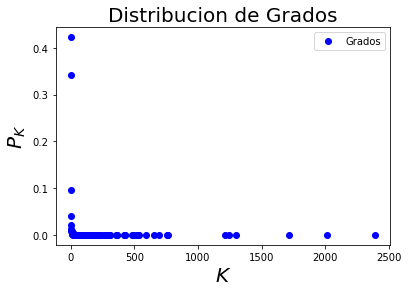

In [8]:
plt.plot(k, pk, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()
    
plt.plot(k, pk, 'bo')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()    

In [ ]:
grados = defaultdict(int)
